# Proyecto
Diego Fernando Valle Morales
Carné: 20003022

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

import collections 
import numpy as np
from math import sqrt, exp

import time
import math
import tensorflow as tf

import tensorboard
%reload_ext tensorboard
tensorboard.__version__


'2.2.2'

In [73]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


In [75]:
from sklearn import metrics

Se inicia cargando el set de datos.

In [3]:
setDatosTitanic= pd.read_csv("data_titanic_proyecto.csv")
setDatosTitanic.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


#### Analisis de los datos

In [4]:
setDatosTitanic.isnull().sum()

PassengerId             0
Name                    0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [5]:
setDatosTitanic.dtypes

PassengerId             int64
Name                   object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
passenger_class        object
passenger_sex          object
passenger_survived     object
dtype: object

In [6]:
setDatosTitanic["passenger_class"].unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

In [7]:
setDatosTitanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
setDatosTitanic["passenger_survived"].unique()

array(['N', 'Y'], dtype=object)

In [9]:
setDatosTitanic["passenger_sex"].unique()

array(['M', 'F'], dtype=object)

Convertiremos el tipo de los datos para que sea más manipulable

In [10]:
setDatosTitanic["Age"] = setDatosTitanic['Age'].astype('float32')
setDatosTitanic["Fare"] = setDatosTitanic['Fare'].astype('float32')
setDatosTitanic["Age"].fillna(setDatosTitanic["Age"].median(skipna=True), inplace=True)

setDatosTitanic["Ticket"] = setDatosTitanic['Ticket'].astype('category').cat.codes
setDatosTitanic["Embarked"] = setDatosTitanic['Embarked'].astype('category').cat.codes
setDatosTitanic["passenger_class"] = setDatosTitanic['passenger_class'].astype('category').cat.codes
setDatosTitanic["passenger_sex"] = setDatosTitanic['passenger_sex'].astype('category').cat.codes
setDatosTitanic["passenger_survived"] = setDatosTitanic['passenger_survived'].astype('category').cat.codes

setDatosTitanic.drop('Name', axis = 1, inplace = True)
setDatosTitanic.drop('Cabin', axis = 1, inplace = True)
setDatosTitanic.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,22.0,1,0,523,7.250000,2,0,1,0
1,2,38.0,1,0,596,71.283302,0,2,0,1
2,3,26.0,0,0,669,7.925000,2,0,0,1
3,4,35.0,1,0,49,53.099998,2,2,0,1
4,5,35.0,0,0,472,8.050000,2,0,1,0


Volvemos a verificar si hay datos nulos

In [11]:
setDatosTitanic.isnull().sum()

PassengerId           0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Embarked              0
passenger_class       0
passenger_sex         0
passenger_survived    0
dtype: int64

In [12]:
setDatosTitanic.describe()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,338.528620,32.204247,1.529742,0.691358,0.647587,0.383838
std,257.353842,13.019696,1.102743,0.806057,200.850657,49.693409,0.800254,0.836071,0.477990,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,337.000000,14.454200,2.000000,0.000000,1.000000,0.000000
75%,668.500000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000,1.000000,1.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,680.000000,512.329224,2.000000,2.000000,1.000000,1.000000


#### Analisis por gráficos de los datos

Es importante recordar lo que significa la nomenclatura que se presenta:
* Passenger_survived: No (0) y Si (1)
* Passenger_Sex: Mujer (F)(0) y Hombre (M)(1)
* Passenger_class: Lower (0), Middle (1) y Upper (2)
* Embarked: C (0), Q (1) y S (2)

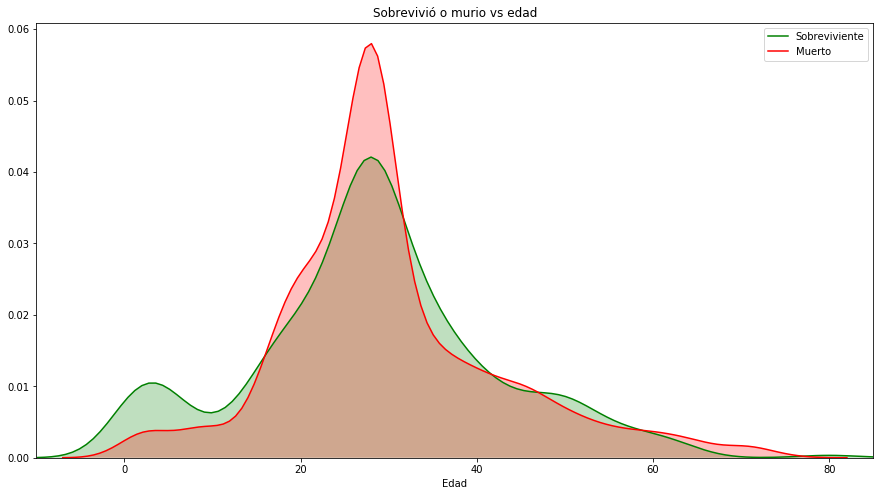

In [17]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.kdeplot(setDatosTitanic["Age"][setDatosTitanic.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(setDatosTitanic["Age"][setDatosTitanic.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobreviviente', 'Muerto'])
plt.title('Sobrevivió o murio vs edad')
ax.set(xlabel='Edad')
plt.xlim(-10,85)
plt.show()

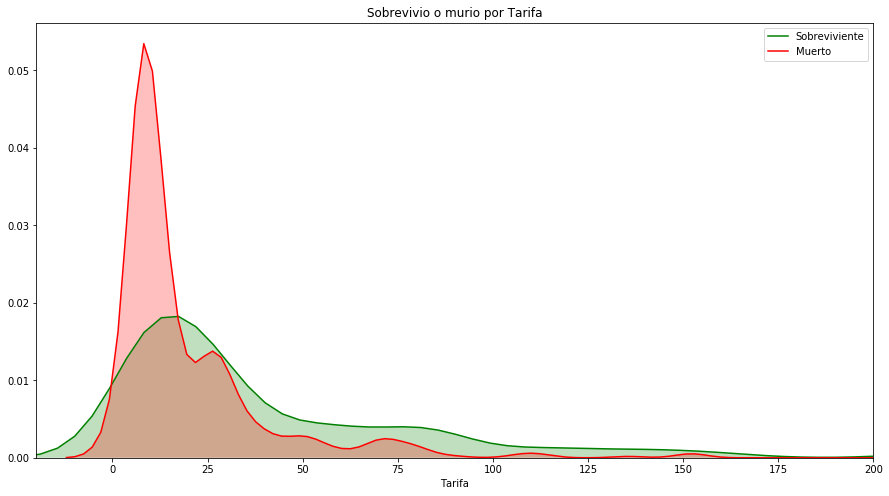

In [18]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(setDatosTitanic["Fare"][setDatosTitanic.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(setDatosTitanic["Fare"][setDatosTitanic.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobreviviente', 'Muerto'])
plt.title('Sobrevivio o murio por Tarifa')
ax.set(xlabel='Tarifa')
plt.xlim(-20,200)
plt.show()

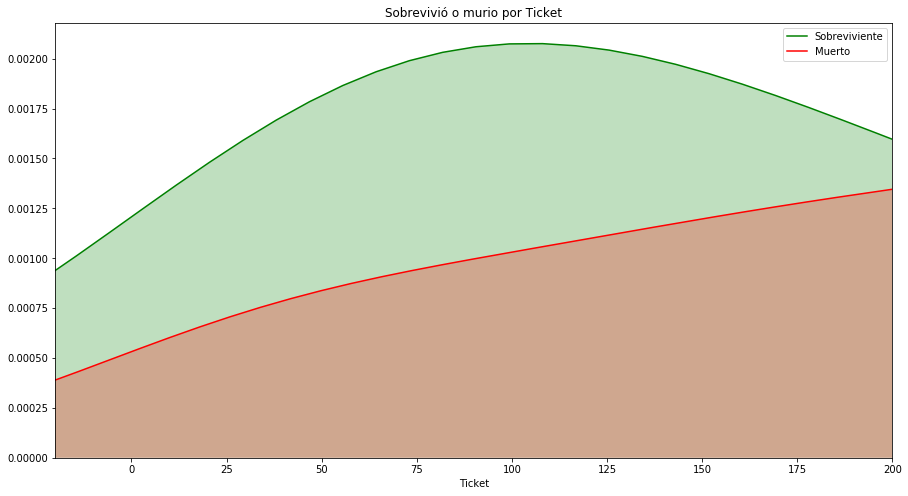

In [19]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(setDatosTitanic["Ticket"][setDatosTitanic.passenger_survived == 1], color="green", shade=True)
sns.kdeplot(setDatosTitanic["Ticket"][setDatosTitanic.passenger_survived == 0], color="red", shade=True)
plt.legend(['Sobreviviente', 'Muerto'])
plt.title('Sobrevivió o murio por Ticket')
ax.set(xlabel='Ticket')
plt.xlim(-20,200)
plt.show()

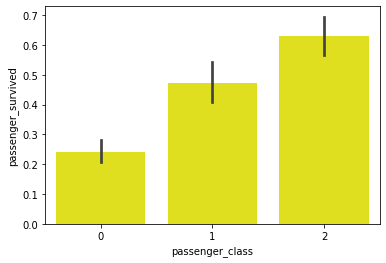

In [22]:
sns.barplot('passenger_class', 'passenger_survived', data=setDatosTitanic, color="yellow")

plt.show()

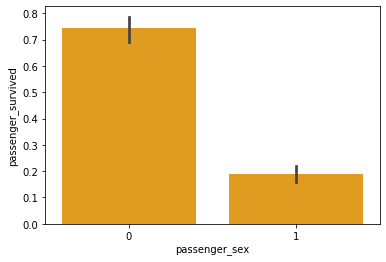

In [24]:
sns.barplot('passenger_sex', 'passenger_survived', data=setDatosTitanic, color="orange")
plt.show()

In [25]:
setDatosTitanic.corr()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
PassengerId,1.000000,0.034212,-0.057527,-0.001652,-0.056554,0.012658,0.012985,0.035144,0.042939,-0.005007
Age,0.034212,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.031903,0.339898,0.081163,-0.064910
SibSp,-0.057527,-0.233296,1.000000,0.414838,0.079461,0.159651,0.071480,-0.083081,-0.114631,-0.035322
Parch,-0.001652,-0.172482,0.414838,1.000000,0.020003,0.216225,0.043351,-0.018443,-0.245489,0.081629
Ticket,-0.056554,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.011146,-0.319869,0.059372,-0.164549
Fare,0.012658,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.230365,0.549500,-0.182333,0.257307
Embarked,0.012985,-0.031903,0.071480,0.043351,0.011146,-0.230365,1.000000,-0.173511,0.118492,-0.176509
passenger_class,0.035144,0.339898,-0.083081,-0.018443,-0.319869,0.549500,-0.173511,1.000000,-0.131900,0.338481
passenger_sex,0.042939,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.118492,-0.131900,1.000000,-0.543351
passenger_survived,-0.005007,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.176509,0.338481,-0.543351,1.000000


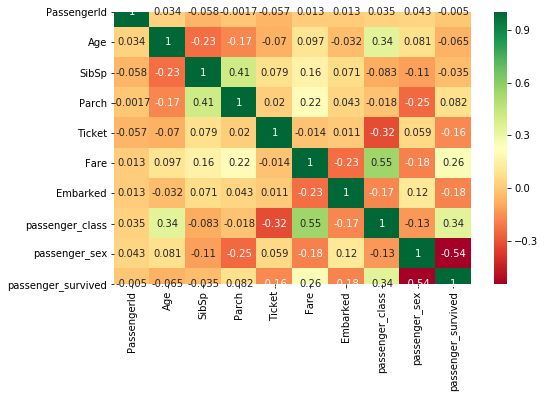

In [26]:
plt.subplots(figsize=(8, 5))
sns.heatmap(setDatosTitanic.corr(), annot=True, cmap="RdYlGn")
plt.show()

#### Train-val-test split 
El primer paso es separar los datos en entrenamiento, validación y pruebas:

* separar datos en entrenamiento y pruebas. Por ejemplo usando: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* tomar una porción de datos de entrenamiento del paso anterior para validación.

**Se usará una separación 70%, 30% y para la validación se usará el 20% de los datos de entrenamiento.**


In [39]:
entrena, prueba = train_test_split( setDatosTitanic, test_size=0.3, random_state=42)
entrena, valida = train_test_split( entrena, test_size=0.1, random_state=42)

In [40]:
print("El tamaño de los conjuntos de datos es: ")
print("ENTRENAMIENTO: ", entrena.shape, "\nPRUEBA: ", prueba.shape, "\nVALIDA: ", valida.shape)

El tamaño de los conjuntos de datos es: 
ENTRENAMIENTO:  (560, 10) 
PRUEBA:  (268, 10) 
VALIDA:  (63, 10)


#### Preparando los modelos

In [41]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
to_predict = ['passenger_survived']

In [43]:
def decision_tree(x, y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x, y)
    return clf

In [45]:
tree_model = decision_tree(entrena[features], entrena[to_predict])
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
accuracy = accuracy_score(prueba[to_predict], tree_model.predict(prueba[features]))
accuracy

0.746268656716418

In [49]:
def svm(x, y, kernel, degree, c):
    clf = SVC(gamma='scale', decision_function_shape='ovo', degree = degree, kernel = kernel, C = c)
    clf = clf.fit(x, y)
    return clf

In [50]:
svc_model = svm(entrena[features], entrena[to_predict], 'rbf', 3, 1)
svc_model

C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
accuracy = accuracy_score(prueba[to_predict], svc_model.predict(prueba[features]))
accuracy

0.6567164179104478

In [53]:
def naive_bayes_scikit(x, y):
    gnb = GaussianNB()
    gnb = gnb.fit(x, y)
    return gnb

In [54]:
nb_model = naive_bayes_scikit(entrena[features], entrena[to_predict])
nb_model

C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
accuracy = accuracy_score(prueba[to_predict], nb_model.predict(prueba[features]))
accuracy

0.7798507462686567

In [57]:
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0] - n_0) - 1))
    return m, v # mean and variance 

def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            denominator = sqrt(2*3.14*v[i][j])
            if denominator == 0:
                continue
            product = product * (1/denominator) * exp(-0.5 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

def naive_bayes(X_train, y_train, x_test):
    predictions = np.zeros(x_test.shape[0])
    predictions.shape
    for i in range(0, predictions.shape[0]):
        x = x_test[i]
        m, v, pre_probab, pfc, pcf, prediction = GNB(X_train, y_train, x)
        predictions[i] = prediction
    return predictions

In [58]:
X_train = np.array(entrena[features])
y_train = np.array(entrena['passenger_survived'])
x_test = np.array(prueba[features])

predictions = naive_bayes(X_train, y_train, x_test)

In [59]:
accuracy = accuracy_score(prueba[to_predict], predictions)
accuracy

0.7798507462686567

In [62]:
logs_dir = r"C:\Users\diego\StatisticalLearning\Proyecto\logs"

target=to_predict
train_data = entrena[features].as_matrix()
test_data = prueba[features].as_matrix()
val_data = valida[features].as_matrix()
X_train = train_data[100:,:]
y_train = train_data[100:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:100,:]
y_val = val_data[:100,:]
y_val = np.reshape(y_val,-1)
X_test = test_data
print('Estructura datos de entrenamiento: ', X_train.shape)
print('Estructura etiquetas entrenamiento (Y): ', y_train.shape)
print('Estructura datos de Validacion: ', X_val.shape)
print('Estructura etiquetas de validacion (Y): ', y_val.shape)
print('Estructura datos de prueba: ', X_test.shape)

def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False, learning_rate = 0.001, rl = 0.001):
    
    # tiene la accuracy en el cálculo de tensorflow
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # mezcla indicios
    train_indicies = np.arange(Xd.shape[0])

    training_now = training is not None
    
    # establece las variables que se desean computar y optimizar
    # si se tiene una función de entrenamiento, se le agrega lo que se desea computar
    variables = [cost_op,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # contador 
    iter_cnt = 0
    for e in np.arange(epochs):
        # almacena las pérdidas y el accuracy
        correct = 0
        losses = []
        # asegurarse que se itera sobre el dataset una vez
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            # genera indicios para el batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # crea un feed dictionary para este lote
            feed_dict = {x: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # obtiene el tamanio del lote (batch)
            actual_batch_size = yd[idx].shape[0]
            # tiene la pérdida en el calculo de tensorflow y predicciones correctas
            # y si es dado, hace un paso de entrenamiento
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # agrega estadísticas de rendimiento
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # imprime cada now y then
            if training_now and (iter_cnt % print_every) == 0:
                print("ITERACION {0}: con una pérdida de entrenamiento en minbatch = {1:.3g} y accuracy de {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("EPOCH {2}, Pérdida General = {0:.3g} y accuracy de {1:.3g}"
              .format(total_loss,total_correct,e+1))
        if plot_losses and (e == epochs-1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('numero minibatch')
            plt.ylabel('perdida minibatch')
            plt.show()
    return total_loss,total_correct

Estructura datos de entrenamiento:  (460, 5)
Estructura etiquetas entrenamiento (Y):  (2300,)
Estructura datos de Validacion:  (63, 5)
Estructura etiquetas de validacion (Y):  (315,)
Estructura datos de prueba:  (268, 5)


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [63]:
def logisticRegression(session, Xd, yd, epochs=1, batch_size=64, print_every=100,
                       plot_losses=False, learning_rate = 0.001, rl = 0.001, training = False):
        # limpia viejas variables
#     tf.reset_default_graph()
        
    numFeatures = Xd.shape[1]
    numLabels = 2
    
    x = tf.placeholder(tf.float32, [None, numFeatures], name = 'x')
    y = tf.placeholder(tf.int64, [None], name = 'y')
    is_training = tf.placeholder(tf.bool)
    
     #Parametro Regularizacion
    Lambda = rl
    learningRate = tf.train.exponential_decay(learning_rate= learning_rate,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.90,
                                          staircase=True)
    # learningRate = learning_rate
    with tf.variable_scope("model", reuse=tf.AUTO_REUSE):
        weights=tf.get_variable("weights",shape=[numFeatures,numLabels])
        bias=tf.get_variable("bias",shape=[numLabels])
        y_out = tf.matmul(x,weights)+bias

    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.one_hot(y,2),logits=y_out))
    regularizer = tf.nn.l2_loss(weights)
    cost_op = tf.reduce_mean(loss + Lambda * regularizer)
    optimizer = tf.train.GradientDescentOptimizer(learningRate)
    train_step = optimizer.minimize(cost_op)
    prediction = tf.argmax(y_out,1)
    #se empieza la sesion
    
    
#     sess = tf.Session()
#     sess.run(tf.global_variables_initializer())

    if training is True:
        session.run(tf.global_variables_initializer())
    
#     run_model(predict = y_out, loss_val = cost_op, Xd = Xd, yd = yd, y = y, epochs = epochs, 
#               batch_size = batch_size, print_every = print_every, training = training, plot_losses = plot_losses)

    # tener accuracy de calculo de tensorflow
    correct_prediction = tf.equal(tf.argmax(y_out,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # mezcla los indicios
    train_indicies = np.arange(Xd.shape[0])

    training_now = training is not False
    
    # configura variables que queremos calcular y optimizar
    # si se tiene función de entrenamiento, se agregan las cosas a calcular
    variables = [cost_op,correct_prediction,accuracy]
    if training_now:
        variables[-1] = train_step
    
    # contador 
    #empieza la sesión
    
    iter_cnt = 0
    for e in np.arange(epochs):
        # se da seguimiento a las pérdidas y al accuracy
        correct = 0
        losses = []
        # nos aseguramos que iteramos sobre el dataset una vez
        for i in np.arange(int(math.ceil(Xd.shape[0]/batch_size))):
            # generar indicios para el lote de datos (batch)
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # creando un feed dictionary para este batch
            feed_dict = {x: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # obtener el tamaño de batch
            actual_batch_size = yd[idx].shape[0]
            # tener pérdida de cálculo de tensorflow y predicciones correctas
            # y si es necesario crear un paso de entrenamiento
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # agregando las estadísticas de rendimiento
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # imprimir cada now y then
            if training_now and (iter_cnt % print_every) == 0:
                print("ITERACION {0}: con una pérdida de entrenamiento en minbatch = {1:.3g} y accuracy de {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        if e % print_every == 0:
            print("EPOCH {2}, Pérdida General = {0:.3g} y accuracy de {1:.3g}"
              .format(total_loss,total_correct,e+1))
        if plot_losses and (e == epochs-1):
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('numero minibatch')
            plt.ylabel('perdida minibatch')
            plt.show()
            
        
    return (total_loss,total_correct, session, y_out, cost_op, prediction)

Entrenamiento
ITERACION 0: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
EPOCH 1, Pérdida General = 8.3 y accuracy de 0.204
ITERACION 1000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 2000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 3000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 4000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
EPOCH 1001, Pérdida General = 8.3 y accuracy de 0.204
ITERACION 5000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 6000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 7000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
ITERACION 8000: con una pérdida de entrenamiento en minbatch = 8.51 y accuracy de 0.17
EPOCH 2001, Pérdida General = 8.3 y accuracy de 0.204
ITERACION 9000: con una pérdida de entrenamient

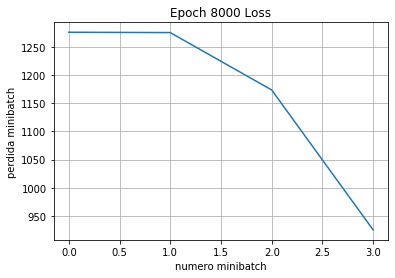

Validación
EPOCH 1, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 101, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 201, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 301, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 401, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 501, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 601, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 701, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 801, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 901, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1001, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1101, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1201, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1301, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1401, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1501, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1601, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1701, Pérdida General = 8.8 y accuracy de 0.238
EPOCH 1801, Pérdida General =

(8.803595542907715,
 0.23809523809523808,
 <tf.Tensor 'model_1/add:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'Mean_4:0' shape=() dtype=float32>,
 <tf.Tensor 'ArgMax_2:0' shape=(?,) dtype=int64>)

In [74]:
print('Entrenamiento')
X_train = train_data[:,:]
y_train = train_data[:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:,:]
y_val = val_data[:,:]
y_val = np.reshape(y_val,-1)
X_test = test_data

tf.reset_default_graph()
session = tf.Session()

total_loss, total_correct, sess, y_out, cost_op, _ = logisticRegression(session = session, Xd = X_train, yd = y_train,
                   epochs = 8000, batch_size = 150, print_every = 1000, 
                   plot_losses = True, learning_rate = 0.0000000000001, rl = 0.001, training = True)

print('Validación')
# run_model(session,y_out,cost_op,X_val,y_val,1,100)
logisticRegression(session = session, Xd = X_val, yd = y_val,
                   epochs = 8000, batch_size = 150, training = False)

In [76]:
def getMetrics(Y, y_hat):
    accuracy = metrics.accuracy_score(Y, y_hat)
    f1 = metrics.f1_score(Y, y_hat)
    recall = metrics.recall_score(Y, y_hat)
    precision = metrics.precision_score(Y, y_hat)
    error = metrics.mean_squared_error(Y, y_hat)
    return (accuracy, f1, recall, precision, error)

def printMetrics(Y, y_hat):
    accuracy, f1, recall, precision, error = getMetrics(Y, y_hat)
    print('Accuracy ', accuracy)
    print('F1 ', f1)
    print('Recall ', recall)
    print('Precision ', precision)
    print('MSE ', error)
#     print(metrics.confusion_matrix(Y, y_hat))

#### Entrenamiento del Modelo

In [77]:
list(entrena.columns)

['PassengerId',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'passenger_class',
 'passenger_sex',
 'passenger_survived']

In [78]:
features = ['Ticket', 'passenger_sex', 'passenger_class', 'Fare', 'Embarked']
to_predict = ['passenger_survived']
tree_model = decision_tree(entrena[features], entrena[to_predict])
printMetrics(prueba[to_predict], tree_model.predict(prueba[features]))

Accuracy  0.7835820895522388
F1  0.7314814814814815
Recall  0.7117117117117117
Precision  0.7523809523809524
MSE  0.21641791044776118


In [79]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
svc_model = svm(entrena[features], entrena[to_predict], 'poly', 3, 1.2)
printMetrics(prueba[to_predict], svc_model.predict(prueba[features]))

Accuracy  0.6343283582089553
F1  0.2686567164179105
Recall  0.16216216216216217
Precision  0.782608695652174
MSE  0.3656716417910448


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
features = ['Ticket', 'Parch', 'SibSp','passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
nb_model = naive_bayes_scikit(entrena[features], entrena[to_predict])
printMetrics(prueba[to_predict], nb_model.predict(prueba[features]))

Accuracy  0.7947761194029851
F1  0.7577092511013217
Recall  0.7747747747747747
Precision  0.7413793103448276
MSE  0.20522388059701493


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
X_train = np.array(entrena[features])
y_train = np.array(entrena['passenger_survived'])
x_test = np.array(prueba[features])

predictions = naive_bayes(X_train, y_train, x_test)
printMetrics(prueba[to_predict], predictions)

Accuracy  0.7947761194029851
F1  0.7577092511013217
Recall  0.7747747747747747
Precision  0.7413793103448276
MSE  0.20522388059701493


Training
ITERACION 0: con una pérdida de entrenamiento en minbatch = 6.32 y accuracy de 0.17
EPOCH 1, Pérdida General = 7.38 y accuracy de 0.189


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


ITERACION 1000: con una pérdida de entrenamiento en minbatch = 1.21 y accuracy de 0.3
ITERACION 2000: con una pérdida de entrenamiento en minbatch = 0.999 y accuracy de 0.17
ITERACION 3000: con una pérdida de entrenamiento en minbatch = 0.812 y accuracy de 0.2
ITERACION 4000: con una pérdida de entrenamiento en minbatch = 0.737 y accuracy de 0.15
ITERACION 5000: con una pérdida de entrenamiento en minbatch = 0.701 y accuracy de 0.17
ITERACION 6000: con una pérdida de entrenamiento en minbatch = 0.638 y accuracy de 0.3
ITERACION 7000: con una pérdida de entrenamiento en minbatch = 0.648 y accuracy de 0.28
ITERACION 8000: con una pérdida de entrenamiento en minbatch = 0.615 y accuracy de 0.35
ITERACION 9000: con una pérdida de entrenamiento en minbatch = 0.646 y accuracy de 0.2
ITERACION 10000: con una pérdida de entrenamiento en minbatch = 0.571 y accuracy de 0.2
ITERACION 11000: con una pérdida de entrenamiento en minbatch = 0.574 y accuracy de 0.2
ITERACION 12000: con una pérdida de e

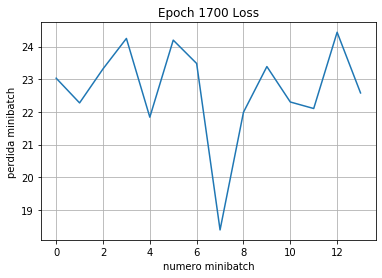

0.567174568772316
0.21785714285714286


In [82]:
features = ['passenger_sex', 'passenger_class', 'Fare', 'Embarked', 'Age']
print('Training')

train_data = entrena[features].as_matrix()
test_data = prueba[features].as_matrix()
val_data = valida[features].as_matrix()

X_train = train_data[:,:]
y_train = train_data[:,:]
y_train = np.reshape(y_train,-1)
X_val = val_data[:,:]
y_val = val_data[:,:]
y_val = np.reshape(y_val,-1)
X_test = test_data

tf.reset_default_graph()
session = tf.Session()

total_loss, total_correct, sess, y_out, cost_op, _ = logisticRegression(session = session, Xd = X_train, yd = y_train,
                   epochs = 1700, batch_size = 40, print_every = 1000, 
                   plot_losses = True, learning_rate = 0.0001, rl = 1.8, training = True)
print(total_loss)
print(total_correct)

# print('Validation')
# run_model(session,y_out,cost_op,X_val,y_val,1,100)
# logisticRegression(session = session, Xd = X_val, yd = y_val,
#                    epochs = 8000, batch_size = 150, training = False)

### K - Fold

Este es un tipo común de validación cruzada que es ampliamente usada en machine learning.

#### Validación Cruzada (Cross Validation)

La validación cruzada es una técnica muy usada para evaluar el rendimiento de los modelos de machine learning. Ayuda en conocer como el modelo de machine learning se generalizaría a un set de datos independiente. Se puede usar esta técnica para estimar que tan exactas serán las predicciones del modelo en la práctica.

Cuando se da un problema de machine learning, se tienen dos tipos de datasets, como se ve en este problema existen datos conocidos (datos de entrenamiento) y datos desconocidos (datos de prueba). Usando validación cruzada, se estará probando el modelo de machine learning en la fase de entrenamiento, para verificar si hay overfitting y obtener una idea de cómo el modelo de machine learning se generalizará ocn datos independientes, que se dan en el conjunto de datos de prueba.

En una ronda de validación cruzada, se tendrá que dividir el set de entrenamiento de datos original en dos partes: 

* Set de entrenamiento del conjunto de datos
* Set de validación prueba o set de validación

Se entrenará el modelo de machine learning en la validación cruzada usando el set de entrenamiento y se probará con el set de validación. Se podrá saber que tan exactas son las predicciones del modelo de machine learning cuando se compare con las predicciones del set de validación y las etiquetas actuales del los puntos de datos en el set de validación.

Para reducir la varianza, muchas rondas de validación cruzada se realizan usando diferentes sets de entrenamiento y de pruebas. El resultado de todas las pruebas se promedia para estimar la exactitud del modelo de machine learning.

#### Implementando la validación K-Fold

Se debe realizar siguiendo los siguientes pasos:
1. Particionar el set de datos de entrenamiento en __k__ subgrupos iguales. Cada subgrupo es llamado **fold**. Los folds serán llamados $f_1, f_2, ..., f_k$
2. Se realiza un ciclo for que va desde i= 1 hasta k
    a. Se mantiene el fold 